In [36]:
# handling data 
import os
import numpy as np 
import pandas as pd 
import random
import gender_guesser.detector as gender

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# %matplotlib inline

# machine learning 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import ensemble
from sklearn import metrics

import pickle

In [37]:
df = pd.read_csv('../data/model_data.csv')
df.head()

,Name,networth,category,gender,profile_pic,age,DOB,nationality,education,marital_status,source_of_wealth,birth_place,personal_details,profile_link,Degree,age_group
0,Diana Ballinger,87000000.0,Business,Female,https://static1.therichestimages.com/wordpress...,34.0,NaN,United Kingdom,Guildhall School of Music and Drama,Widow,Business (Transport - Go-Ahead),United Kingdom,Ballinger's late husband Martin led a manageme...,https://www.therichest.com/celebnetworth/celeb...,Post Graduate,2
1,Elizabeth Tompkins,87000000.0,Business,Male,https://static1.therichestimages.com/wordpress...,34.0,NaN,United Kingdom,Guildhall School of Music and Drama,Married,Business,United Kingdom,The widow of one of Britain’s most successful ...,https://www.therichest.com/celebnetworth/celeb...,high school,2
2,Christian Louboutin,85000000.0,Business,Male,https://static1.therichestimages.com/wordpress...,57.0,"January 7, 1963",France,BA Architecture - Sorbonne,Married,Fashion and Design,"Paris, France",French footwear designer Christian Louboutin h...,https://www.therichest.com/celebnetworth/celeb...,high school,2
3,Robert Iger,85000000.0,Business,Male,https://static1.therichestimages.com/wordpress...,70.0,"February 19, 1951",United States,Ithaca College,Married,The Walt Disney Company,"Oceanside, New York",American entrepreneur Robert Iger is the Chair...,https://www.therichest.com/celebnetworth/celeb...,high school,3
4,Nigel Page and Justine Laycock,84000000.0,Business,Male,https://static1.therichestimages.com/wordpress...,34.0,NaN,United Kingdom,Guildhall School of Music and Drama,Divorced,Lottery,United Kingdom,Nigel Page and Justine Laycock became Britain’...,https://www.therichest.com/celebnetworth/celeb...,Post Graduate,2


### Encoding : 

In [38]:
label_encoder = preprocessing.LabelEncoder()

df['gender']= label_encoder.fit_transform(df['gender'])
df['category']= label_encoder.fit_transform(df['category'])
df['Degree']= label_encoder.fit_transform(df['Degree'])
df['marital_status']= label_encoder.fit_transform(df['marital_status'])
df['nationality']= label_encoder.fit_transform(df['nationality'])

In [39]:
X = df[['gender', 'category', 'Degree', 'marital_status', 'nationality']]
y = df['networth']

### Correlation : 

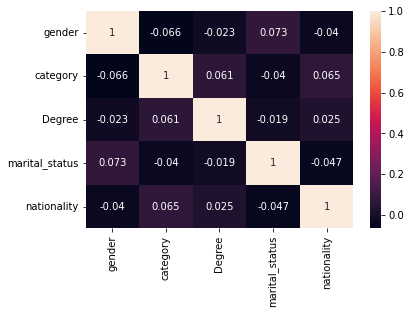

In [40]:
sns.heatmap(X.corr(), annot= True);

### Feature importance

In [41]:
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.06901753 0.23220085 0.10225852 0.17076476 0.42575835]


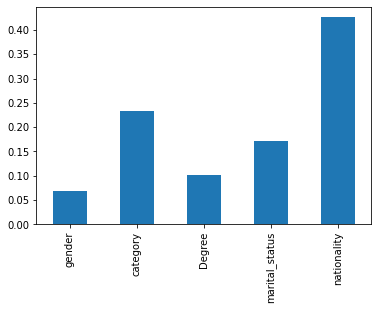

In [42]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.plot(kind='bar')
plt.show();

In [49]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)

### Train test split 

In [45]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42)

In [50]:
data = {}
data['x_train'] = x_train 
data['x_test'] = x_test
data['y_train'] = y_train 
data['y_test'] = y_test
data['scalar_mean'] = scalar.mean_
data['scalar_sd'] = scalar.scale_

In [51]:
root = '../data/'
file = open(root+'model_data.pkl', 'wb')
pickle.dump(data, file)
file.close()